# Raw Analytics - Diabetes Health Indicators

Analise de qualidade dos dados brutos da camada Bronze. 

## Importação de Bibliotecas

Importação das bibliotecas que serão usadas: pandas para manipulação dos dados, matplotlib.pyplot e seaborn para a geração dos gráficos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Carregamento

Carregar o dataset data_raw.csv da camada raw para um DataFrame no Jupyter.

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_theme(context="notebook", style="whitegrid")

df_raw = pd.read_csv('data_raw.csv')
df_raw_temp = df_raw.copy()

## 3. Análise Exploratória Com Gráficos

#### 3.1 Proporção das classes de Diabetes (Gráfico de Pizza)

A coluna Diabetes_012 é a variável alvo do nosso dataset, indicando se o indivíduo é não diabético, pré-diabético ou diabético. O gráfico de pizza nos mostra rapidamente se há desbalanceamento entre as classes.

Em bases desbalanceadas, modelos de classificação podem se tornar tendenciosos, priorizando a classe majoritária e reduzindo a capacidade de identificar corretamente as classes minoritárias.Por isso, essa análise é importante para avaliar a representatividade do dataset e decidir se será necessário aplicar técnicas de balanceamento antes da modelagem.

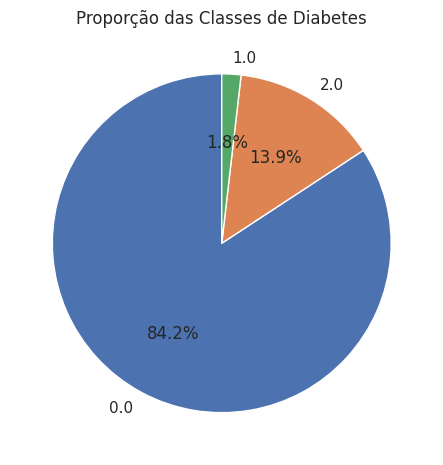

In [3]:
df_raw["Diabetes_012"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Proporção das Classes de Diabetes")
plt.ylabel("")
plt.show()


#### 3.2 Distribuição do BMI (Histograma + Linha de Densidade)

O gráfico de histograma com densidade apresenta a distribuição da variável BMI (Body Mass Index), que é um dos principais fatores de risco associados ao diabetes.Essa análise permite identificar onde os dados se concentram, se existem valores extremos (outliers) e qual é o formato da distribuição (simetria ou assimetria).

O histograma mostra a frequência dos valores em intervalos (bins), enquanto a curva de densidade (KDE) facilita a interpretação visual da forma da distribuição e ajuda a identificar tendências gerais.

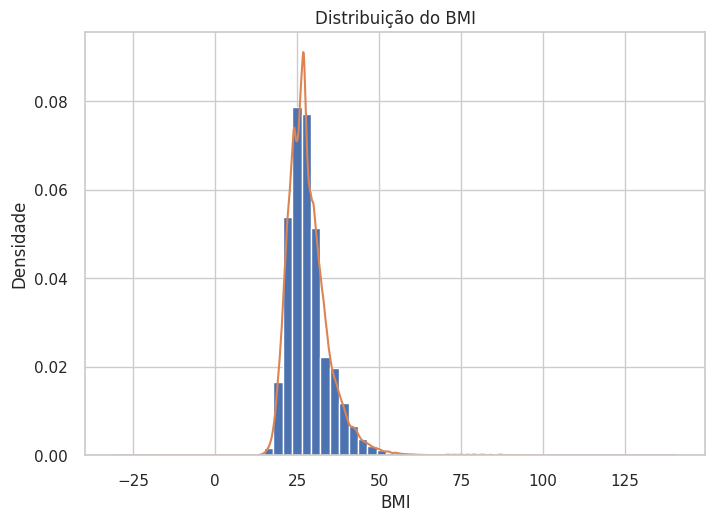

In [4]:
df_raw["BMI"].plot(kind="hist", bins=30, density=True)
df_raw["BMI"].plot(kind="kde")
plt.title("Distribuição do BMI")
plt.xlabel("BMI")
plt.ylabel("Densidade")
plt.show()


#### 3.3 Comparação de BMI por Diabetes (Boxplot)

O boxplot apresenta a distribuição do BMI (Body Mass Index) para cada classe da variável alvo Diabetes_012, permitindo comparar como o índice de massa corporal se comporta em pessoas não diabéticas, pré-diabéticas e diabéticas.

O objetivo dessa análise é observar diferenças na distribuição do BMI entre as classes, especialmente a mediana e os quartis, além da presença de outliers.Isso ajuda a entender se indivíduos com diabetes tendem a apresentar valores de BMI mais elevados, o que pode indicar uma relação entre obesidade e risco de diabetes.

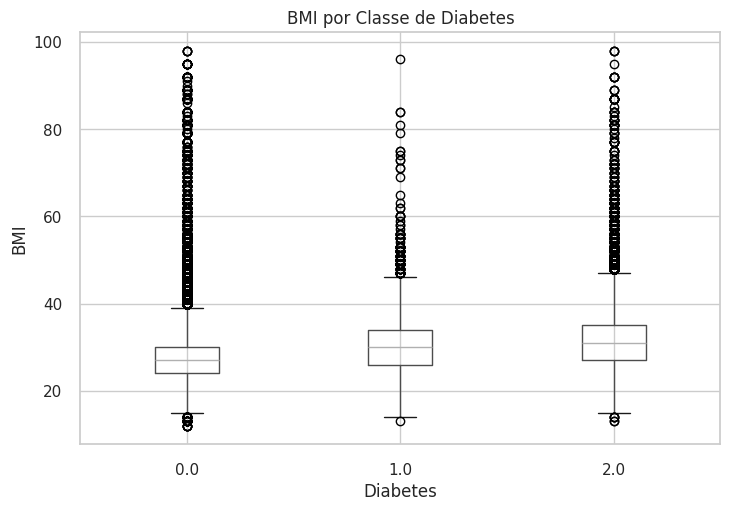

In [5]:
df_raw.boxplot(column="BMI", by="Diabetes_012")
plt.title("BMI por Classe de Diabetes")
plt.suptitle("")
plt.xlabel("Diabetes")
plt.ylabel("BMI")
plt.show()


#### 3.4 Diabetes × Pressão Alta (Gráfico de Barras Empilhadas)

O objetivo desse gráfico é mostrar proporções, e não apenas quantidades absolutas. Dessa forma, é possível responder perguntas como: “Entre pessoas com pressão alta, qual a proporção de diabéticos?” ou “Entre pessoas sem pressão alta, qual a proporção de pré-diabéticos?”.

gráfico de barras empilhadas normalizadas apresenta a relação entre pressão alta (HighBP) e a variável alvo Diabetes_012. O código utiliza pd.crosstab() para criar uma tabela cruzada entre as duas variáveis e, ao usar normalize="index", transforma os valores em proporções dentro de cada grupo. O parâmetro stacked=True cria barras empilhadas.

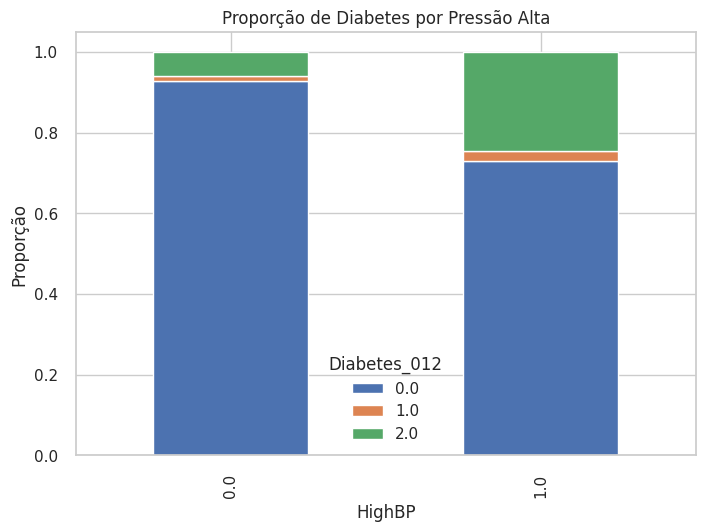

In [6]:
pd.crosstab(
    df_raw["HighBP"],
    df_raw["Diabetes_012"],
    normalize="index"
).plot(kind="bar", stacked=True)

plt.title("Proporção de Diabetes por Pressão Alta")
plt.xlabel("HighBP")
plt.ylabel("Proporção")
plt.show()


#### 3.5 Idade × Diabetes (Gráfico de Área)

O gráfico de área apresenta a relação entre faixas etárias (Age) e a variável alvo Diabetes_012. Esse tipo de visualização é útil para identificar padrões de crescimento ou mudança conforme a idade aumenta. O código utiliza crosstab() para cruzar as faixas de idade com as classes de diabetes e, com plot(kind="area", stacked=True), cria áreas empilhadas que mostram o crescimento acumulado de cada classe ao longo da idade.

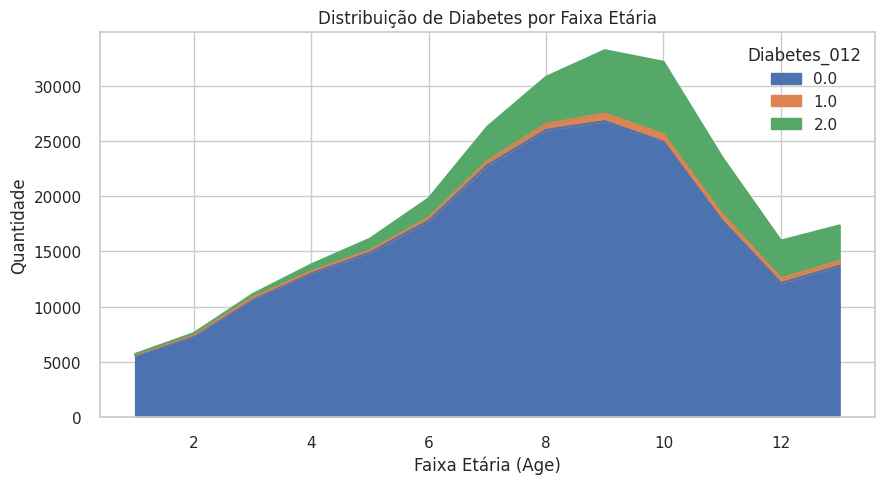

In [7]:
pd.crosstab(
    df_raw["Age"],
    df_raw["Diabetes_012"]
).plot(kind="area", stacked=True, figsize=(10,5))

plt.title("Distribuição de Diabetes por Faixa Etária")
plt.xlabel("Faixa Etária (Age)")
plt.ylabel("Quantidade")
plt.show()


#### 3.6 Atividade Física × Diabetes (Gráfico de Barras Horizontais)

A coluna PhysActivity indica se o indivíduo pratica atividade física e é um fator comportamental relevante, pois a prática regular de exercícios está associada à redução do risco de diabetes.O objetivo desse gráfico é comparar a distribuição do diabetes entre pessoas ativas e sedentárias, permitindo observar se há diferenças entre esses grupos.

O código utiliza barh para gerar as barras horizontais, facilitando a visualização e interpretação dos resultados.

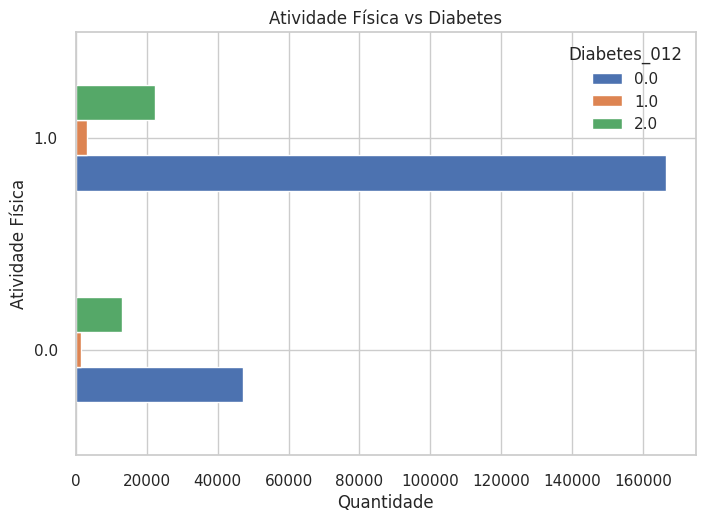

In [8]:
pd.crosstab(
    df_raw["PhysActivity"],
    df_raw["Diabetes_012"]
).plot(kind="barh")

plt.title("Atividade Física vs Diabetes")
plt.xlabel("Quantidade")
plt.ylabel("Atividade Física")
plt.show()


#### 3.7 Saúde Geral (Gráfico de Linha)

O gráfico de linha apresenta a distribuição da variável GenHlth, que é uma avaliação ordinal da saúde geral (por exemplo, 1 = excelente e 5 = ruim). É possível ter uma percepção de saúde da população, permitindo observar se há maior concentração em avaliações positivas ou negativas.

O código utiliza value_counts().sort_index() para garantir que os valores sejam apresentados na ordem correta e marker="o" para destacar cada ponto do gráfico, facilitando a leitura e interpretação dos resultados.

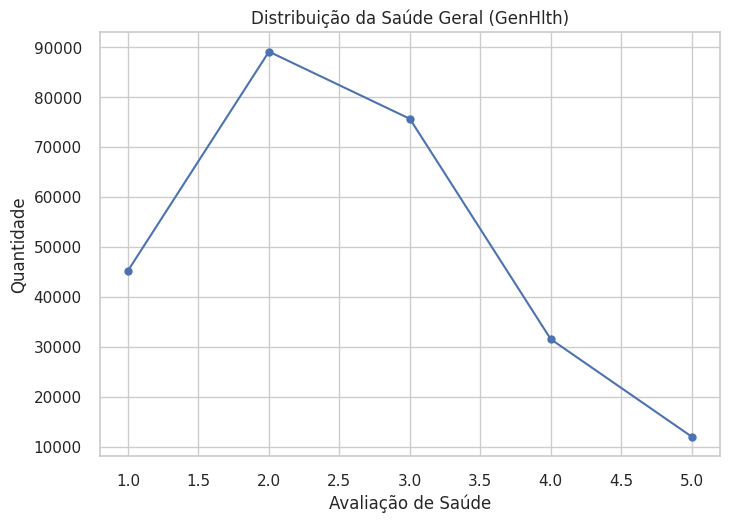

In [9]:
df_raw["GenHlth"].value_counts().sort_index().plot(kind="line", marker="o")

plt.title("Distribuição da Saúde Geral (GenHlth)")
plt.xlabel("Avaliação de Saúde")
plt.ylabel("Quantidade")
plt.show()


#### 3.8 Saúde Mental × Saúde Física (Scatter Plot)

O scatter plot (gráfico de dispersão) apresenta a relação entre saúde mental (MentHlth) e saúde física (PhysHlth), duas variáveis numéricas contínuas que representam o número de dias ruins no último mês.

O objetivo desse gráfico é investigar se existe alguma relação visual entre saúde mental e saúde física, ou seja, se pessoas que relatam mais dias ruins mentalmente também tendem a relatar mais dias ruins fisicamente.

O código utiliza plt.scatter() para plotar cada indivíduo como um ponto no gráfico. O parâmetro alpha=0.3 adiciona transparência aos pontos, reduzindo a sobreposição e tornando mais fácil observar a densidade das regiões com maior concentração de dados.

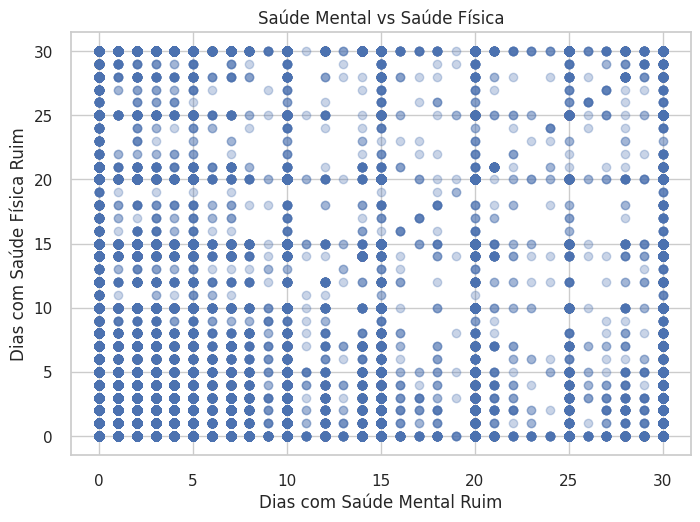

In [10]:
plt.scatter(df_raw["MentHlth"], df_raw["PhysHlth"], alpha=0.3)
plt.title("Saúde Mental vs Saúde Física")
plt.xlabel("Dias com Saúde Mental Ruim")
plt.ylabel("Dias com Saúde Física Ruim")
plt.show()

#### 3.9 Renda × Diabetes (Gráfico de Barras Agrupadas)

A coluna Income representa faixas de renda e é um determinante social importante da saúde, pois o nível socioeconômico influencia acesso a alimentação, saúde e hábitos de vida. Nos permite avaliar diferenças na proporção de diabetes entre diferentes faixas econômicas, permitindo identificar se há padrões de maior ocorrência em determinados grupos.Esse tipo de análise é relevante para discutir desigualdade social em saúde.

O código utiliza crosstab() para criar uma tabela cruzada entre renda e diabetes e, com plot(kind="bar"), gera barras agrupadas por classe, facilitando a comparação direta entre as faixas de renda.

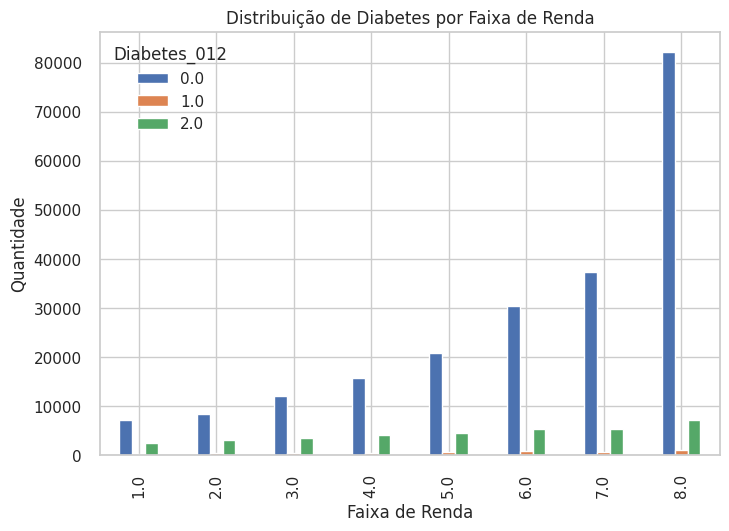

In [11]:
pd.crosstab(
    df_raw["Income"],
    df_raw["Diabetes_012"]
).plot(kind="bar")

plt.title("Distribuição de Diabetes por Faixa de Renda")
plt.xlabel("Faixa de Renda")
plt.ylabel("Quantidade")
plt.show()


#### 3.10 Correlação Global (Mapa de Calor)

O mapa de correlação é uma visualização que permite analisar várias variáveis ao mesmo tempo, oferecendo uma visão global do dataset. Ele é útil para identificar relações lineares potenciais entre diferentes variáveis, ajudando a entender quais atributos podem estar associados entre si.

O código utiliza df_raw.corr() para calcular a correlação de Pearson entre as variáveis numéricas. Em seguida, imshow() desenha o mapa de calor e colorbar() adiciona uma escala de cores que facilita a interpretação da intensidade das correlações.

O objetivo desse gráfico é mostrar padrões gerais de correlação e encerrar a análise exploratória com uma visão macro do conjunto de dados.

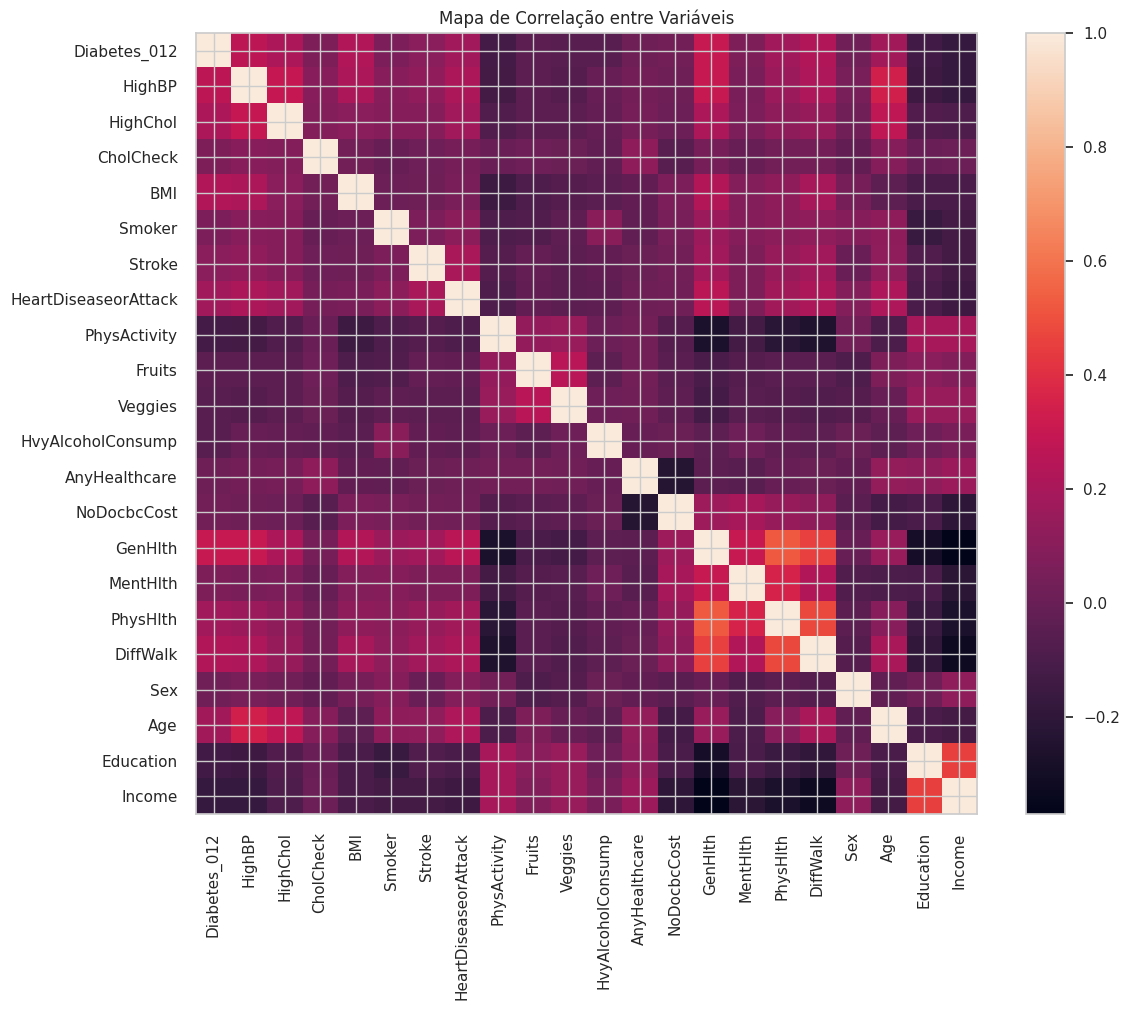

In [14]:
corr = df_raw.corr()

plt.figure(figsize=(12, 10))
plt.imshow(corr)
plt.colorbar()

# Definindo os rótulos dos eixos
plt.xticks(
    ticks=range(len(corr.columns)),
    labels=corr.columns,
    rotation=90
)

plt.yticks(
    ticks=range(len(corr.columns)),
    labels=corr.columns
)

plt.title("Mapa de Correlação entre Variáveis")
plt.tight_layout()
plt.show()